# Image Classification with Convolutional Neural Networks (CNN)

### Florian POSCENTE Rayane NADAUD Bastien HENRY

## 1 Data understanding and preparation
--------------------

## <p style = "color:#FF6347;"> Task 1 : Load the CIFAR-10 Dataset <p>

**Question 1**


cifar10.load_data() permitted to loads the CIFAR-10 dataset, which consists of 60,000 color images of size 32x32 pixels. There are 50,000 training images and 10,000 test images, divided into 10 different classes (e.g., airplanes, cars, birds, etc.)

In [1]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


**Question 2**

train_images.shape gives the dimensions of the training dataset :  50,000 images, size 32x32 pixels,3 color channels and test_images.she gives similar dimensions for the test set, which typically contains 10,000 images.


In [2]:
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


**Question 3**

The first dimension ( [0] ) represents the number of images. , so [1] and [2] is the height and width of each image.

In [3]:
print(f'Number of training samples: {train_images.shape[0]}')
print(f'Number of test samples: {test_images.shape[0]}')


Number of training samples: 50000
Number of test samples: 10000


**Question 4**

.shape: This gives the shape of the first image, which in CIFAR-10 will be (32, 32, 3), representing:32 pixels in height.32 pixels in width.3 channels for the color information (RGB).


In [4]:
print(f'Each image shape: {train_images[0].shape}')


Each image shape: (32, 32, 3)


## <p style = "color:#FF6347;"> Task 2 : Visualize the Dataset <p>

**Question 1**

In [5]:
import matplotlib.pyplot as plt
import numpy as np

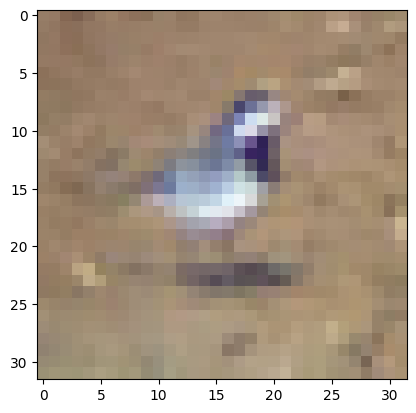

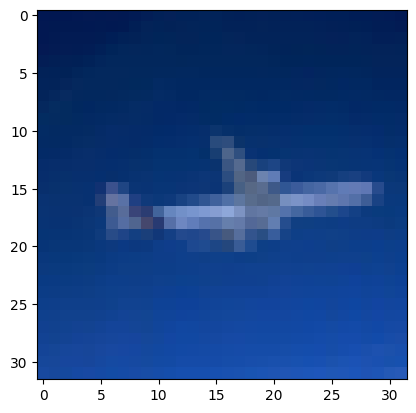

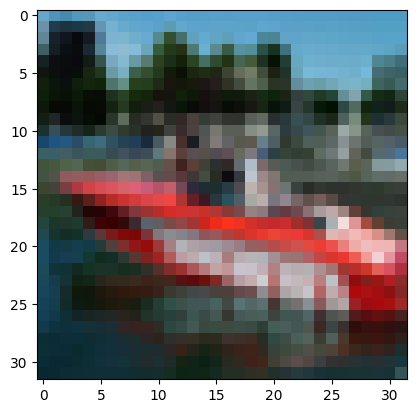

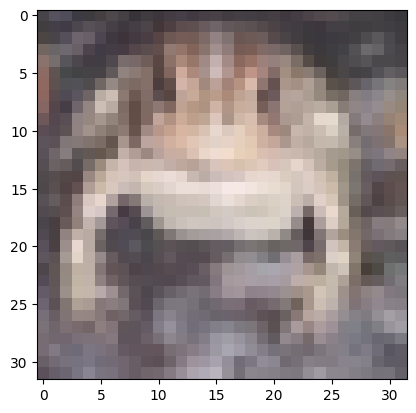

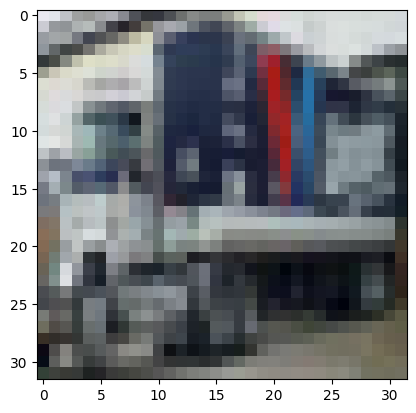

In [6]:
indices = np.random.randint(0, len(train_images), size=5)
for i in indices:
    plt.imshow(train_images[i])
    plt.show()

**Question 2**

In [7]:
print(f'Labels: {train_labels[indices]}')


Labels: [[2]
 [0]
 [8]
 [6]
 [9]]


**Question 3**

Images are really pixelized, a little bit difficult for human to analyze and classify it but it can be done whit a little effort. However a model well trained can do it whithout any problems

## <p style = "color:#FF6347;"> Task 3 : Normalize the Data <p>

In [8]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


Question 2

Normalization speeds up convergence during training and stabilizes the learning process, as CNNs are sensitive to the scale of input data. Without it, the training process can become slower or unstable, as the network might have trouble learning from data that has a wide range of values. Normalizing the inputs helps the network learn better by keeping the updates to the model’s weights smooth and steady, which is necessary for good performance.


**Question 3**

Normalizing pixel values brings several advantages. It helps the neural network train faster because the inputs are now on the same scale, preventing the model from giving too much importance to larger values. It also improves the stability of training, making the learning process more efficient.

**Question 4**

Normalization helps neural networks learn more quickly and accurately, which enhances their overall performance. Large or unstable gradients are avoided, enabling the model to arrive at an ideal solution more quickly. The model performs well on both the training and test sets because normalization prevents overfitting and improves the model's ability to generalize to new, unseen data.


## <p style = "color:#FF6347;"> Task 4 : Apply One-Hot Encoding to the Labels <p>

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)


**Question 2**

In classification problems, one-hot encoding is essential because it makes it possible for the neural network to handle multiple classes more efficiently. The labels would be interpreted as ordinal values (such as 0, 1, 2) in the absence of one-hot encoding, which might cause the network to believe that the classes are inherently ordered or separated from one another.

**Question 3**

One-hot encoding represents the class labels as binary vectors, where each class has its own position in the vector. It helps in training the neural network by making the target output compatible with the activation function (like softmax) used in the final layer of the network.

## <p style = "color:#FF6347;"> Task 5 : Explore the Class Distribution <p>

We used ChatGPT to help us

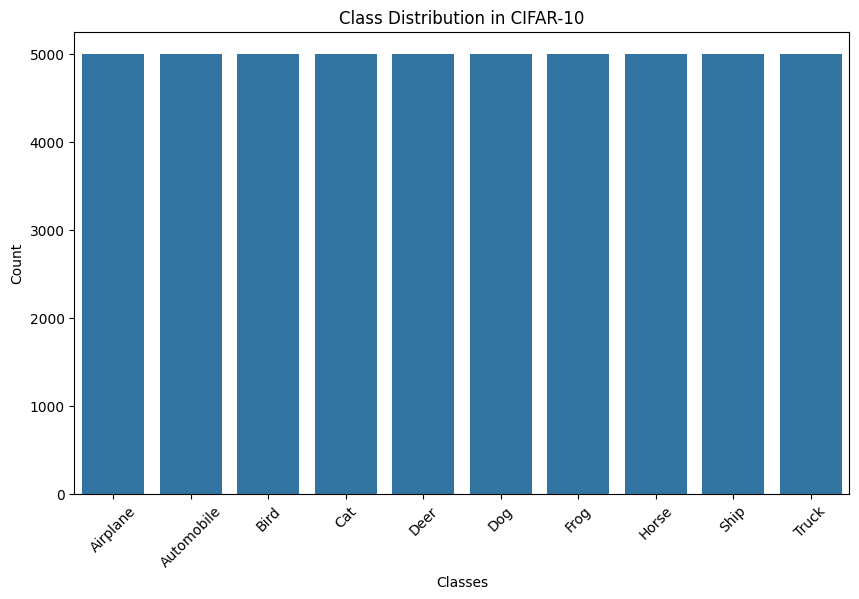

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


train_labels_flatten = train_labels.flatten()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels_flatten)

plt.title('Class Distribution in CIFAR-10')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.xticks(np.arange(10), class_names, rotation=45)

plt.show()


**Question2**

Each class in the CIFAR-10 dataset has an equal amount of samples, making it typically balanced.Consequently, every class makes an equal contribution to the dataset; none is overrepresented or underrepresented.


**Question 3**

A dataset that is unbalanced, meaning that some classes contain a disproportionately high number of samples, can result in biased model performance, hence it is essential to examine the class distribution before training a model. Overrepresented classes may cause the model to become biased toward making more frequent predictions for those classes, which could lead to poor accuracy for underrepresented classes.

##  2 Data Modeling
-------------------

### LeNet-5 Implementation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Creating the model ( we did some research)

In [12]:
def create_lenet5():
    model = Sequential()
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
 
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))
    
    return model


In [13]:
lenet5 = create_lenet5()
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\basti\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### VGG BLOCK FUNCTION

In [14]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [15]:
def vgg_block():
    block = Sequential()
    block.add(Conv2D(filters= 32,kernel_size= (3, 3), activation='relu', padding='same'))
    block.add(Conv2D(filters= 32, kernel_size=(3, 3), activation='relu', padding='same'))
    block.add(MaxPooling2D((2, 2)))
    return block

**VGG 1**

In [16]:
def create_vgg1():
    model = Sequential()
    model.add(vgg_block())  
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

Compile VGG1

In [17]:
vgg1 = create_vgg1()
vgg1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**VGG 2**

In [18]:
def create_vgg2():
    model = Sequential()
    model.add(vgg_block())
    model.add(vgg_block())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax')) 
    
    return model

Compile VGG2

In [19]:
vgg2 = create_vgg2()
vgg2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**VGG 3**

In [20]:
def create_vgg3():
    model = Sequential()
    model.add(vgg_block())
    model.add(vgg_block())
    model.add(vgg_block())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model


Compile VGG 3

In [21]:
vgg3 = create_vgg3()
vgg3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training Model

Training LeNet-5

In [22]:
history_lenet5 = lenet5.fit(train_images, train_labels_one_hot, epochs=10, validation_data=(test_images, test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3466 - loss: 1.7723 - val_accuracy: 0.4942 - val_loss: 1.4123
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5234 - loss: 1.3357 - val_accuracy: 0.5285 - val_loss: 1.3616
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5683 - loss: 1.2114 - val_accuracy: 0.5775 - val_loss: 1.1984
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5994 - loss: 1.1276 - val_accuracy: 0.5867 - val_loss: 1.1794
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6231 - loss: 1.0645 - val_accuracy: 0.6017 - val_loss: 1.1247
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6490 - loss: 1.0036 - val_accuracy: 0.6139 - val_loss: 1.1067
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6588 - loss: 0.9640 - val_accuracy: 0.6178 - val_loss: 1.0985
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6796 - loss: 0.91

Training VGG1

In [23]:
history_vgg1 = vgg1.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4277 - loss: 1.5748 - val_accuracy: 0.6277 - val_loss: 1.0511
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6668 - loss: 0.9507 - val_accuracy: 0.6615 - val_loss: 0.9771
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7274 - loss: 0.7750 - val_accuracy: 0.6855 - val_loss: 0.9117
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7698 - loss: 0.6593 - val_accuracy: 0.6809 - val_loss: 0.9620
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8135 - loss: 0.5353 - val_accuracy: 0.6736 - val_loss: 1.0071
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8544 - loss: 0.4252 - val_accuracy: 0.6828 - val_loss: 1.0598
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8896 - loss: 0.3190 - val_accuracy: 0.6731 - val_loss: 1.2110
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9156 -

Training VGG2

In [24]:
history_vgg2 = vgg2.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3768 - loss: 1.7094 - val_accuracy: 0.5798 - val_loss: 1.1779
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6369 - loss: 1.0366 - val_accuracy: 0.6614 - val_loss: 0.9495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7084 - loss: 0.8338 - val_accuracy: 0.7023 - val_loss: 0.8511
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7582 - loss: 0.6972 - val_accuracy: 0.7185 - val_loss: 0.8098
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7917 - loss: 0.5889 - val_accuracy: 0.6910 - val_loss: 0.8984
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8250 - loss: 0.4972 - val_accuracy: 0.7202 - val_loss: 0.8554
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8555 - loss: 0.4116 - val_accuracy: 0.7117 - val_loss: 0.9402
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.8800 -

In [25]:
history_vgg3 = vgg3.fit(train_images, train_labels_one_hot, epochs= 10, validation_data=(test_images,test_labels_one_hot))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.3306 - loss: 1.8011 - val_accuracy: 0.5505 - val_loss: 1.2346
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5834 - loss: 1.1618 - val_accuracy: 0.6433 - val_loss: 1.0098
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6704 - loss: 0.9212 - val_accuracy: 0.6835 - val_loss: 0.9017
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7184 - loss: 0.7971 - val_accuracy: 0.7175 - val_loss: 0.8124
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7448 - loss: 0.7160 - val_accuracy: 0.7181 - val_loss: 0.8107
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7772 - loss: 0.6336 - val_accuracy: 0.7404 - val_loss: 0.7827
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.7960 - loss: 0.5785 - val_accuracy: 0.7487 - val_loss: 0.7615
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8099 -

### Model Prediction

LeNet-5

In [26]:
import random

predictions_lenet5 = lenet5.predict(test_images)

predicted_classes_lenet5 = np.argmax(predictions_lenet5, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_lenet5[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted: 7, Actual: 7
Predicted: 8, Actual: 8
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 7, Actual: 7


In [27]:
test_loss_lenet5, test_accuracy_lenet5 = lenet5.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of LeNet5: {test_accuracy_lenet5}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6079 - loss: 1.1156
Test accuracy of LeNet5: 0.6111000180244446


VGG1

In [28]:
predictions_VGG1 = vgg1.predict(test_images)

predicted_classes_VGG1 = np.argmax(predictions_VGG1, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG1[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted: 2, Actual: 2
Predicted: 7, Actual: 7
Predicted: 5, Actual: 5
Predicted: 1, Actual: 9
Predicted: 1, Actual: 9


In [29]:
test_loss_VGG1, test_accuracy_VGG1 = vgg1.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG1: {test_accuracy_VGG1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6616 - loss: 1.6830
Test accuracy of VGG1: 0.6553000211715698


VGG2

In [30]:
predictions_VGG2 = vgg2.predict(test_images)

predicted_classes_VGG2 = np.argmax(predictions_VGG2, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG2[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Predicted: 8, Actual: 0
Predicted: 9, Actual: 9
Predicted: 4, Actual: 3
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2


In [31]:
test_loss_VGG2, test_accuracy_VGG2 = vgg2.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3: {test_accuracy_VGG2}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7094 - loss: 1.1690
Test accuracy of VGG3: 0.710099995136261


VGG3

In [32]:
predictions_VGG3 = vgg3.predict(test_images)

predicted_classes_VGG3 = np.argmax(predictions_VGG3, axis=1)

random_indices = random.sample(range(test_images.shape[0]), 5)

for i in random_indices:
    print(f"Predicted: {predicted_classes_VGG3[i]}, Actual: {test_labels[i][0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted: 4, Actual: 4
Predicted: 9, Actual: 9
Predicted: 1, Actual: 1
Predicted: 9, Actual: 9
Predicted: 8, Actual: 8


In [33]:
test_loss_VGG3, test_accuracy_VGG3 = vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3: {test_accuracy_VGG3}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7569 - loss: 0.7574
Test accuracy of VGG3: 0.7595000267028809


## Optimizer

1. What is an optimizer in the context of deep learning ?

In the context of deep learning, an optimizer represents a pivotal component that facilitates the calibration of a neural network's parameters during the training phase. Its principal objective is to minimize the model's error or loss function, thereby enhancing overall performance. A range of optimization algorithms, collectively referred to as optimizers, employ a variety of strategies to converge towards optimal parameter values, thereby facilitating more accurate predictions in an efficient manner.

2. Explain the role of an optimizer during the training of a neural network. How does it affect the learning
process ?

During the training phase, the optimizer is responsible for updating the model's weights with the objective of reducing the discrepancy between the predicted output and the actual target. The learning process is affected by the optimizer, which determines the rate at which the model converges to an optimal solution. The selection of an optimizer and its associated parameters (such as the learning rate) influence the rate of convergence, the stability of the learning process, and the likelihood of the model identifying a local or global minimum within the loss function.

3. What are the most common types of optimizers ?

The most common optimizers used in deep learning include:

    Stochastic Gradient Descent (SGD)

    SGD with Momentum

    RMSprop

    Adam (Adaptive Moment Estimation)

    AdaGrad (Adaptive Gradient Algorithm)

    AdaDelta

    AdamW

4. Compare how different optimizers (SGD, Adam, etc) update the model weights during training and how
this affects learning efficiency and speed.

SGD updates weights based on loss function gradient. It's simple but slow and may get stuck. It works well with large datasets, but you have to set the learning rate carefully.
SGD with momentum: Adds a term that remembers the previous update, which helps to speed up convergence and dampens oscillations.
Adam combines the advantages of AdaGrad and RMSprop. It makes the learning rate faster and more efficient than SGD. It uses both first and second moments of gradients, making the weight updates more robust.
RMSprop: Like AdaGrad, but it normalizes the gradients to prevent the learning rate from decaying too quickly.

5. How do the different optimizers perform with the VGG architecture ?

The VGG architecture is deep and consists of many layers, which makes training challenging in terms of time and convergence. Based on empirical evidence:

SGD: Works well with VGG but requires a lot of tuning of the learning rate and momentum. It often takes more epochs to converge to a good solution, making it slower.

Adam: Generally more efficient and faster at converging with VGG since it automatically adjusts learning rates. However, it may sometimes overfit or not generalize as well as SGD, depending on the task.

RMSprop: Performs similarly to Adam in terms of speed, but may not be as robust on very deep architectures like VGG when it comes to generalization.

In [34]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

### Testing different optimizer (SGD, ADAM(we already use it before) and RMSprop)

SGD

In [35]:
SGD_vgg3 = create_vgg3()

SGD_vgg3.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = SGD_vgg3.fit(train_images, train_labels_one_hot, validation_data=(test_images,test_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.1670 - loss: 2.2153 - val_accuracy: 0.2455 - val_loss: 2.1910
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.3584 - loss: 1.7730 - val_accuracy: 0.4464 - val_loss: 1.5399
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4529 - loss: 1.5170 - val_accuracy: 0.4781 - val_loss: 1.4552
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4966 - loss: 1.4058 - val_accuracy: 0.5112 - val_loss: 1.3715
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.5314 - loss: 1.3159 - val_accuracy: 0.5251 - val_loss: 1.3375
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.5548 - loss: 1.2485 - val_accuracy: 0.5436 - val_loss: 1.2952
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5851 - loss: 1.1668 - val_accuracy: 0.5683 - val_loss: 1.2191
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6050 -

In [36]:
test_loss_SGD, test_accuracy_SGD = SGD_vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3 whit SGD: {test_accuracy_SGD}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6872 - loss: 0.9513
Test accuracy of VGG3 whit SGD: 0.6851999759674072


ADAM

In [37]:
Adam_vgg3 = create_vgg3()

Adam_vgg3.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = Adam_vgg3.fit(train_images, train_labels_one_hot, validation_data=(test_images, test_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3340 - loss: 1.7908 - val_accuracy: 0.5821 - val_loss: 1.1661
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6181 - loss: 1.0719 - val_accuracy: 0.6623 - val_loss: 0.9790
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6903 - loss: 0.8785 - val_accuracy: 0.6822 - val_loss: 0.9133
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7383 - loss: 0.7476 - val_accuracy: 0.7201 - val_loss: 0.8071
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7625 - loss: 0.6761 - val_accuracy: 0.7276 - val_loss: 0.7987
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7898 - loss: 0.6054 - val_accuracy: 0.7369 - val_loss: 0.7746
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8056 - loss: 0.5563 - val_accuracy: 0.7347 - val_loss: 0.7922
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8184 -

In [38]:
test_loss_ADAM, test_accuracy_ADAM = Adam_vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3 whit ADAM: {test_accuracy_ADAM}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7435 - loss: 1.0964
Test accuracy of VGG3 whit ADAM: 0.7398999929428101


RMSprop

In [39]:
RMSprop_vgg3 = create_vgg3()

RMSprop_vgg3.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = RMSprop_vgg3.fit(train_images, train_labels_one_hot, validation_data=(test_images, test_labels_one_hot), epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3167 - loss: 1.8394 - val_accuracy: 0.5275 - val_loss: 1.3017
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5758 - loss: 1.1842 - val_accuracy: 0.6531 - val_loss: 0.9888
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6672 - loss: 0.9476 - val_accuracy: 0.6724 - val_loss: 0.9265
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7041 - loss: 0.8390 - val_accuracy: 0.6994 - val_loss: 0.8787
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7461 - loss: 0.7373 - val_accuracy: 0.7027 - val_loss: 0.8497
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7633 - loss: 0.6831 - val_accuracy: 0.7300 - val_loss: 0.8010
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7857 - loss: 0.6261 - val_accuracy: 0.7102 - val_loss: 0.8522
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7993 -

In [40]:
test_loss_RMSprop, test_accuracy_RMSprop = RMSprop_vgg3.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy of VGG3 whit RMSprop: {test_accuracy_RMSprop}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6776 - loss: 1.1755
Test accuracy of VGG3 whit RMSprop: 0.6741999983787537


## 2.3 Implementation and Performance Evaluation

In [41]:


# Function to plot training history
def plot_history(history, title="Model Performance"):
   
    
    # Extract accuracy and loss data
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and Validation Accuracy - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and Validation Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


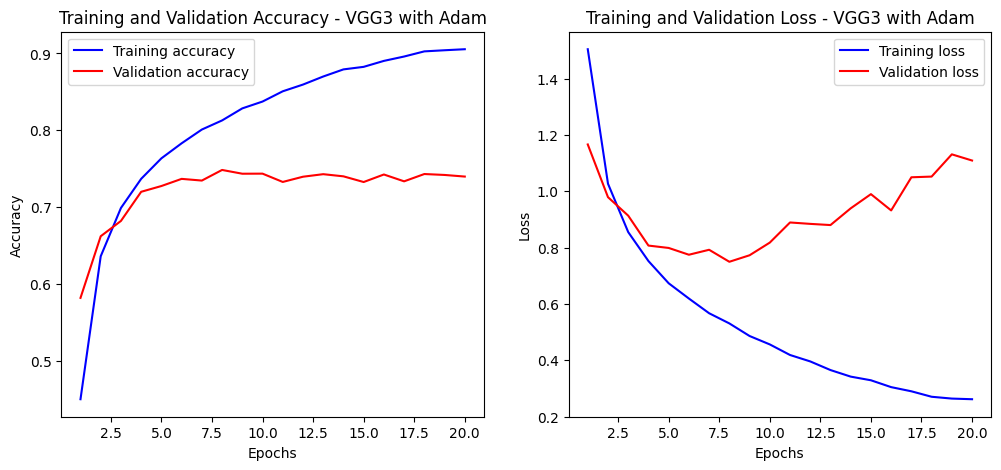

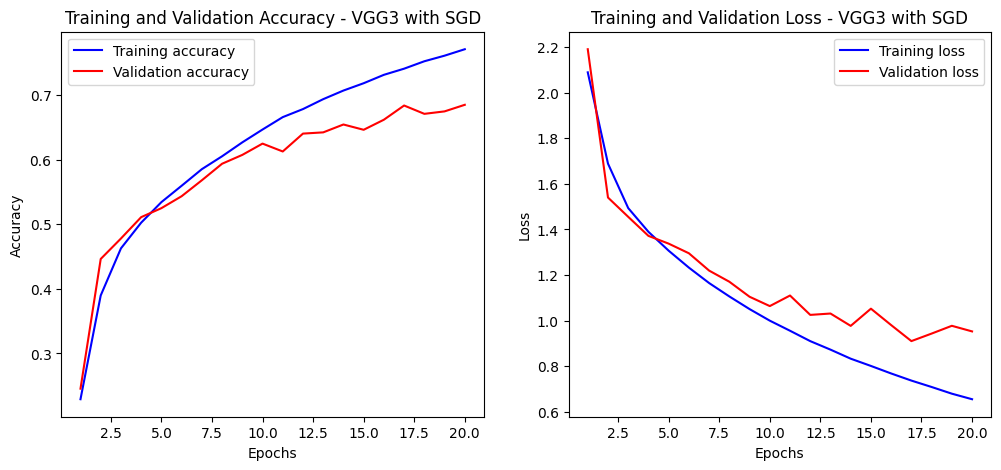

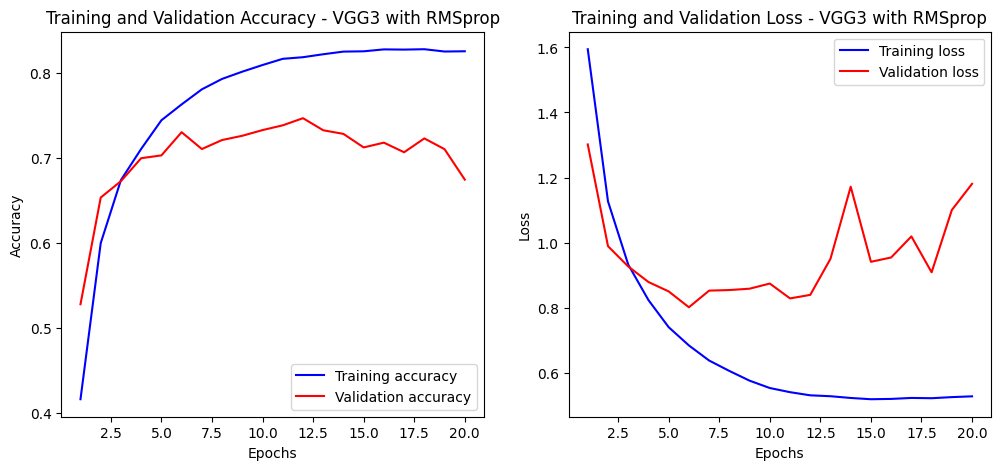

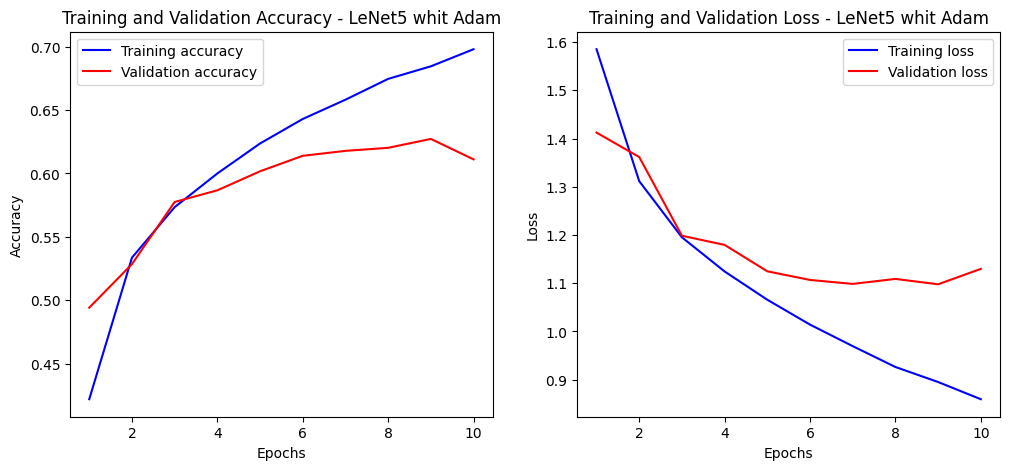

In [42]:
plot_history(history_adam, title="VGG3 with Adam")
plot_history(history_sgd, title="VGG3 with SGD")
plot_history(history_rmsprop, title="VGG3 with RMSprop")
plot_history(history_lenet5, title="LeNet5 whit Adam")

### VGG3 ADAM

* Accuracy: Training accuracy improves steadily, reaching around 0.9 by the end of the 20 epochs, while validation accuracy stabilizes around 0.75. This suggests that the model has good capacity to learn but may start overfitting as the validation accuracy plateaus.

* Loss: The training loss consistently decreases, but the validation loss begins to increase slightly towards the end. This is a clear sign of overfitting, where the model is performing well on the training data but struggles to generalize to the validation set.

The high capacity of the VGG3 model, combined with Adam's faster convergence, enables rapid learning. However, Adam’s aggressive updates might lead to overfitting in deeper networks like VGG3

### VGG3 SGD

* Accuracy: Both training and validation accuracies improve steadily, with validation accuracy reaching about 0.7. The convergence is slower compared to Adam, which is typical for SGD.

* Loss: Both training and validation loss show a steady downward trend, with minimal divergence. The curves indicate that the model may still be learning and could benefit from further training.

GD demonstrates slower but more stable learning. The smaller difference between training and validation performance suggests better generalization. This makes SGD a good choice for more controlled training, especially for deeper models prone to overfitting.

### VGG3 RMSprop

* Accuracy: The training accuracy reaches about 0.85, but the validation accuracy peaks around 0.75, then shows fluctuations. This instability suggests that RMSprop struggles to generalize.

* Loss: The validation loss fluctuates significantly after around 10 epochs, even as training loss decreases consistently. This indicates instability in the validation performance, likely due to overfitting or sensitivity to hyperparameters.

RMSprop adapts the learning rate, which can lead to instability in some cases. The fluctuations in validation loss suggest that RMSprop may be overly responsive to the validation error’s local changes.

### LeNet5 Adam

* Accuracy: Training accuracy increases smoothly, but the validation accuracy stabilizes just above 0.6. This is likely due to the simpler architecture of LeNet5, which may not have sufficient capacity for CIFAR-10.

* Loss: The training and validation loss decrease consistently, with minimal divergence, indicating that LeNet5 generalizes well but lacks the capacity to achieve higher accuracy.

LeNet5’s simplicity results in stable learning with Adam but lacks the depth to capture complex patterns in CIFAR-10. It is a good baseline model. However, its performance suggests that deeper architectures (like VGG) are necessary for better accuracy on this dataset.